# Importe modules

In [2]:
# Computational modules 
%matplotlib inline
import xarray as xr
import glob
import os
import numpy as np
import netCDF4
from netCDF4 import Dataset
import pandas as pd
import re
from array import array
from pylab import *

# Plotting modules 
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import pandas.plotting
import matplotlib.ticker as ticker

# Read amip-piForcing : radiative budget, tas

In [3]:
#------------- open files and read variables ----------------------
path = "/scratch/globc/peatier/CNRM-CM6-1/CFMIP/amip"
variables=['rlut', 'rsut', 'rsdt', 'tas']
filename_ctl_rlut = "/"+variables[0]+"_Amon_CNRM-CM6-1_amip-piForcing_r1i1p1f2_gr_187001-201412.nc"
filename_ctl_rsut = "/"+variables[1]+"_Amon_CNRM-CM6-1_amip-piForcing_r1i1p1f2_gr_187001-201412.nc"
filename_ctl_rsdt = "/"+variables[2]+"_Amon_CNRM-CM6-1_amip-piForcing_r1i1p1f2_gr_187001-201412.nc"
filename_ctl_tas = "/"+variables[3]+"_Amon_CNRM-CM6-1_amip-piForcing_r1i1p1f2_gr_187001-201412.nc"

ctl_rlut = xr.open_dataset(path+filename_ctl_rlut)    
ctl_rsut = xr.open_dataset(path+filename_ctl_rsut)  
ctl_rsdt = xr.open_dataset(path+filename_ctl_rsdt)  
ctl_tas = xr.open_dataset(path+filename_ctl_tas)  

#------------- rlut ----------------------
df_ctl_rlut=ctl_rlut['rlut'].to_dataframe()
df_ctl_rlut_year=df_ctl_rlut.reset_index(level=['time'])
df_ctl_rlut_year['year'] = pd.DatetimeIndex(df_ctl_rlut_year['time']).year
df_ctl_rlut_clim=df_ctl_rlut_year.groupby(['year']).mean()
#df_ctl_rlut_clim

#------------- rsut ----------------------
df_ctl_rsut=ctl_rsut['rsut'].to_dataframe()
df_ctl_rsut_year=df_ctl_rsut.reset_index(level=['time'])
df_ctl_rsut_year['year'] = pd.DatetimeIndex(df_ctl_rsut_year['time']).year
df_ctl_rsut_clim=df_ctl_rsut_year.groupby(['year']).mean()
#df_ctl_rsut_clim

#------------- rsdt ----------------------
df_ctl_rsdt=ctl_rsdt['rsdt'].to_dataframe()
df_ctl_rsdt_year=df_ctl_rsdt.reset_index(level=['time'])
df_ctl_rsdt_year['year'] = pd.DatetimeIndex(df_ctl_rsdt_year['time']).year
df_ctl_rsdt_clim=df_ctl_rsdt_year.groupby(['year']).mean()
#df_ctl_rsdt_clim

#------------- tas ----------------------
df_ctl_tas=ctl_tas['tas'].to_dataframe().drop('height',axis=1)
df_ctl_tas_year=df_ctl_tas.reset_index(level=['time'])
df_ctl_tas_year['year'] = pd.DatetimeIndex(df_ctl_tas_year['time']).year
df_ctl_tas_clim=df_ctl_tas_year.groupby(['year']).mean()
#df_ctl_tas_clim

#------------ Merge -------------------
ctl1=pd.merge(df_ctl_rlut_clim, df_ctl_rsut_clim,left_index=True,right_index=True)
ctl2=pd.merge(ctl1, df_ctl_rsdt_clim,left_index=True,right_index=True)
ctl3=pd.merge(ctl2, df_ctl_tas_clim,left_index=True,right_index=True)
ctl3

,rlut,rsut,rsdt,tas
year,,,,
1870,223.725830,103.911697,298.951080,277.275330
1871,223.738297,103.664124,298.951904,277.342285
1872,223.750626,103.670815,299.023926,277.384857
1873,223.844925,103.754616,298.950226,277.331146
1874,223.465515,103.960541,298.951080,277.144165
...,...,...,...,...
2010,225.047501,103.597878,298.951080,278.120728
2011,224.794678,103.102051,298.951904,278.024933
2012,225.122086,103.167130,299.023926,278.249817


In [105]:
# Compute radiative budget 
ctl3['TOA']=(ctl3['rsut']-ctl3['rsdt'])+ctl3['rlut']

# reshape
year_list=range(1870,1979,1)
ctl=ctl3.drop(year_list)
ctl

,rlut,rsut,rsdt,tas,TOA
year,,,,,
1979,224.239502,103.427025,298.951904,277.670441,28.714630
1980,224.656830,103.538246,299.023926,277.896698,29.171143
1981,224.586594,103.496925,298.950226,277.819977,29.133286
1982,224.370270,103.493439,298.951080,277.753204,28.912628
1983,224.186447,103.172760,298.951904,277.739319,28.407303
1984,224.664612,103.319550,299.023926,277.889954,28.960236
1985,224.618607,103.229187,298.950226,277.851624,28.897568
1986,224.553436,103.405975,298.951080,277.894867,29.008331
1987,224.750916,103.453163,298.951904,277.964844,29.252167


# Read amip-p4K : radiative budget, tas

In [106]:
#------------- open files and read variables ----------------------
filename_p4K_rlut = "/"+variables[0]+"_Amon_CNRM-CM6-1_amip-p4K_r1i1p1f2_gr_197901-201412.nc"
filename_p4K_rsut = "/"+variables[1]+"_Amon_CNRM-CM6-1_amip-p4K_r1i1p1f2_gr_197901-201412.nc"
filename_p4K_rsdt = "/"+variables[2]+"_Amon_CNRM-CM6-1_amip-p4K_r1i1p1f2_gr_197901-201412.nc"
filename_p4K_tas = "/"+variables[3]+"_Amon_CNRM-CM6-1_amip-p4K_r1i1p1f2_gr_197901-201412.nc"
filename_p4K_rld = "/rld_CFmon_CNRM-CM6-1_amip-p4K_r1i1p1f2_gr_197901-201412.nc"

p4K_rlut = xr.open_dataset(path+filename_p4K_rlut)    
p4K_rsut = xr.open_dataset(path+filename_p4K_rsut)  
p4K_rsdt = xr.open_dataset(path+filename_p4K_rsdt)  
p4K_tas = xr.open_dataset(path+filename_p4K_tas)  
p4K_rld = xr.open_dataset(path+filename_p4K_rld)  

#------------- rlut ----------------------
df_p4K_rlut=p4K_rlut['rlut'].to_dataframe()
df_p4K_rlut_year=df_p4K_rlut.reset_index(level=['time'])
df_p4K_rlut_year['year'] = pd.DatetimeIndex(df_p4K_rlut_year['time']).year
df_p4K_rlut_clim=df_p4K_rlut_year.groupby(['year']).mean()
#df_p4K_rlut_clim

#------------- rsut ----------------------
df_p4K_rsut=p4K_rsut['rsut'].to_dataframe()
df_p4K_rsut_year=df_p4K_rsut.reset_index(level=['time'])
df_p4K_rsut_year['year'] = pd.DatetimeIndex(df_p4K_rsut_year['time']).year
df_p4K_rsut_clim=df_p4K_rsut_year.groupby(['year']).mean()
#df_p4K_rsut_clim

#------------- rsdt ----------------------
df_p4K_rsdt=p4K_rsdt['rsdt'].to_dataframe()
df_p4K_rsdt_year=df_p4K_rsdt.reset_index(level=['time'])
df_p4K_rsdt_year['year'] = pd.DatetimeIndex(df_p4K_rsdt_year['time']).year
df_p4K_rsdt_clim=df_p4K_rsdt_year.groupby(['year']).mean()
#df_p4K_rsdt_clim

#------------- tas ----------------------
df_p4K_tas=p4K_tas['tas'].to_dataframe().drop('height',axis=1)
df_p4K_tas_year=df_p4K_tas.reset_index(level=['time'])
df_p4K_tas_year['year'] = pd.DatetimeIndex(df_p4K_tas_year['time']).year
df_p4K_tas_clim=df_p4K_tas_year.groupby(['year']).mean()
#df_p4K_tas_clim

#------------ Merge -------------------
p4K1=pd.merge(df_p4K_rlut_clim, df_p4K_rsut_clim,left_index=True,right_index=True)
p4K2=pd.merge(p4K1, df_p4K_rsdt_clim,left_index=True,right_index=True)
p4K=pd.merge(p4K2, df_p4K_tas_clim,left_index=True,right_index=True)
p4K

,rlut,rsut,rsdt,tas
year,,,,
1979,231.654678,102.461632,299.138092,282.769196
1980,231.456390,102.409836,299.196655,282.691742
1981,231.618195,102.378441,299.127747,282.715454
1982,231.466202,102.621429,299.053345,282.631653
1983,231.298996,102.785454,299.051910,282.812744
1984,231.528061,102.245979,299.036072,282.762970
1985,231.356277,102.511421,298.933105,282.614532
1986,231.311890,102.523132,298.937439,282.790894
1987,231.432693,102.517632,298.956879,282.814880


In [107]:
# Compute radiative budget 
p4K['TOA']=(p4K['rsut']-p4K['rsdt'])+p4K['rlut']
p4K

,rlut,rsut,rsdt,tas,TOA
year,,,,,
1979,231.654678,102.461632,299.138092,282.769196,34.978226
1980,231.456390,102.409836,299.196655,282.691742,34.669571
1981,231.618195,102.378441,299.127747,282.715454,34.868896
1982,231.466202,102.621429,299.053345,282.631653,35.034286
1983,231.298996,102.785454,299.051910,282.812744,35.032547
1984,231.528061,102.245979,299.036072,282.762970,34.737961
1985,231.356277,102.511421,298.933105,282.614532,34.934586
1986,231.311890,102.523132,298.937439,282.790894,34.897583
1987,231.432693,102.517632,298.956879,282.814880,34.993454


# Compute : Delta(TOA), Delta(tas), Lambda

In [108]:
df = pd.DataFrame()
df['TOA_ctl']=ctl['TOA']
df['TOA_p4K']=p4K['TOA']
df['Delta_TOA']=df['TOA_p4K']-df['TOA_ctl']

df['tas_ctl']=ctl['tas']
df['tas_p4K']=p4K['tas']
df['Delta_tas']=df['tas_p4K']-df['tas_ctl']

i=0
N=len(df)
Lbda=[]
while i<N:
    df_tmp=df.iloc[0:i,[2,5]]
    Delta_TOA_cumul=df_tmp['Delta_TOA'].mean()
    Delta_tas_cumul=df_tmp['Delta_tas'].mean()
    Lambda=Delta_TOA_cumul/Delta_tas_cumul
    Lbda.append(Lambda)
    i=i+1
 
df['Lambda']=Lbda
result=df.reset_index(level=['year']).drop(axis=1,columns='year')

result

,TOA_ctl,TOA_p4K,Delta_TOA,tas_ctl,tas_p4K,Delta_tas,Lambda
0,28.714630,34.978226,6.263596,277.670441,282.769196,5.098755,NaN
1,29.171143,34.669571,5.498428,277.896698,282.691742,4.795044,1.228456
2,29.133286,34.868896,5.735611,277.819977,282.715454,4.895477,1.188828
3,28.912628,35.034286,6.121658,277.753204,282.631653,4.878448,1.183130
4,28.407303,35.032547,6.625244,277.739319,282.812744,5.073425,1.200916
5,28.960236,34.737961,5.777725,277.889954,282.762970,4.873016,1.222439
6,28.897568,34.934586,6.037018,277.851624,282.614532,4.762909,1.216386
7,29.008331,34.897583,5.889252,277.894867,282.790894,4.896027,1.223469
8,29.252167,34.993454,5.741287,277.964844,282.814880,4.850037,1.220900
9,28.519669,34.825241,6.305573,277.634338,282.737518,5.103180,1.216818


# Create plots

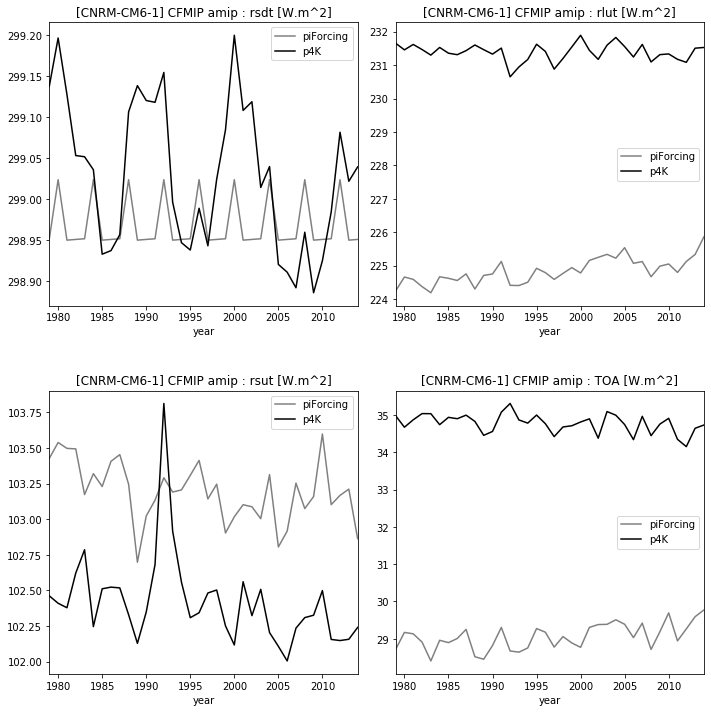

In [109]:
# Plot rsdt
plt.subplot(221)
ax=plt.gca()
ctl.plot(y='rsdt',kind='line',title='[CNRM-CM6-1] CFMIP amip : rsdt [W.m^2]',legend=True, color='Gray',figsize=(10,10),ax=ax)
p4K.plot(y='rsdt',kind='line',legend=True, color='Black',ax=ax)
plt.legend(['piForcing','p4K'])

# Plot rlut
plt.subplot(222)
ax1=plt.gca()
ctl.plot(y='rlut',kind='line',title='[CNRM-CM6-1] CFMIP amip : rlut [W.m^2]',legend=True, color='Gray',figsize=(10,10),ax=ax1)
p4K.plot(y='rlut',kind='line',legend=True, color='Black',ax=ax1)
plt.legend(['piForcing','p4K'])

# Plot rsut
plt.subplot(223)
ax2=plt.gca()
ctl.plot(y='rsut',kind='line',title='[CNRM-CM6-1] CFMIP amip : rsut [W.m^2]',legend=True, color='Gray',figsize=(10,10),ax=ax2)
p4K.plot(y='rsut',kind='line',legend=True, color='Black',ax=ax2)
ax2.legend(['piForcing','p4K'])

# Plot TOA
plt.subplot(224)
ax=plt.gca()
ctl.plot(y='TOA',kind='line',title='[CNRM-CM6-1] CFMIP amip : TOA [W.m^2]',legend=True, color='Gray',figsize=(10,10),ax=ax)
p4K.plot(y='TOA',kind='line',legend=True, color='Black',ax=ax)
ax.legend(['piForcing','p4K'])


#Ajustement des subplots
plt.tight_layout()
plt.subplots_adjust(hspace = 0.30)

# Plot the different variables amip-p4K
#p4K.plot(y='rsut',kind='line',title='[CNRM-CM6-1] CFMIP amip-p4K : rsut [W.m^2]',legend=False)
#p4K.plot(y='rlut',kind='line',title='[CNRM-CM6-1] CFMIP amip-p4K : rlut [W.m^2]',legend=False)
#p4K.plot(y='tas',kind='line',title='[CNRM-CM6-1] CFMIP amip-p4K : tas [Kelvin]',legend=False)
#p4K.plot(y='TOA',kind='line',title='[CNRM-CM6-1] CFMIP amip-p4K : TOA [W.m^2]',legend=False)

# Plot TOA VS tas 
#ctl.plot(x='tas',y='TOA',kind='scatter',title='[CNRM-CM6-1] CFMIP amip-piForcing',legend=False)
#p4K.plot(x='tas',y='TOA',kind='scatter',title='[CNRM-CM6-1] CFMIP amip-p4K',legend=False)

#Plot result
#result.plot(y='Lambda',kind='line',title='[CNRM-CM6-1] CFMIP amip : climate Sensitivity',legend=True)
#result.plot(x='Delta_tas',y='Delta_TOA',kind='scatter',title='[CNRM-CM6-1] CFMIP amip',legend=False)

plt.show()